# CMPS-3160 Final Project: How trends are changed on Steam? 
### Author: Bo Zhang, Tian Xie

https://dekuwang.github.io/

#### Background Information: 
Tian Xie and Bo Zhang are both loyal Steam users, so we wanted to analyze how various games have evolved over time and how players' preferences have changed. We have currently selected a database of Steam games in Data World as of 2017, a dataset that contains information on all of Steam's current games. This dataset includes the game release date, game type, site name, developer, and a number of recommendations. Many of these data have no significant impact on the goal of our analysis. Therefore, we chose to narrow down the type of data to the game release date, game type, and whether it supports multiplayer. We believe that these data have a direct or indirect impact on the popularity of the game. In addition to this although the game genre is the same, there have been innovations in gameplay. This factor also affects the popularity of the type of game. Therefore, if there is a significant change in the popularity of a certain genre, we will also explain the change in popularity in relation to the change in the genre in that year.

With this database, the first question we want to ask is: what are the trends in each type of game? While a certain game genre can be basically mainstream and most popular with users in every era. However, with the improvement of technology and the change in the way of playing games. The situation that a certain game genre becomes mainstream for a long time will change as well. Our current idea is to add up the number of recommendations for all games of the same genre in the same year, and then use a line graph to indicate the popularity of each game genre in that year. the y-axis is set to the number of recommendations, and the x-axis is set to the year. If a game genre has changed beyond recognition compared to the previous year, we assume that this is the case when a new game model or a new technology has emerged. With this one database, we can also determine what the most popular games are for each year. By grouping the games released in the same year into one category, we can find out what the most recommended games are and then analyze the genre of the game. This can be linked to the previous line graphs showing the popularity of different game genres in each year. This is because it is likely that the hottest game of that year drove up the popularity of the game genre to which it belongs. In the meantime, we have decided to add some other databases to support our analysis of the original database. As far as we know, the number of games increased significantly during the epidemic. We wanted to find out if more people would be involved in playing and developing games during the epidemic when most people could not leave their homes. The question we wanted to explore after adding the new database was: did the reduction in recreational activities have an indirect effect on the number of people playing and the number of games played? With the added data, we wanted to link the increase in the number of recommendations to the influence of the external environment, thus reducing the confounding factors on the results obtained from the original database.

The part about how we worked together: We created a repository on GitHub, which contains the databases we need to use and the development of the content. Initially, we agreed to discuss this at a google meeting two to three times a week. The discussions mainly consisted of database selection and what kind of questions we wanted to explore with these databases. At the end of the discussion, we would each complete the parts mentioned in the discussion and push them to GitHub. After the discussion, we worked on our own, but we found that this model of collaboration was not efficient. So we later used the Live Share plugin that comes with vscode. This way two people can edit on the same file and the content can be updated quickly. The initial database was founded by Bo Zhang who proposed to analyze the performance of each game genre from year to year and then create a line graph to show the popularity of different game genres over time, and Tian Xie was responsible for adding more details to the idea later. For example, the change in the number of games during the epidemic and whether the change in the number of players had an impact on the number of recommendations for each game genre.


In [218]:
import pandas as pd
import numpy

sg_df = pd.read_csv("Steam Data/steam_games.csv")
sg_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


Here is a Data set which record all games in Steam until 2020, and our target is to see what's the trend on steam each year, like the average price, type of game, and so on. 

#### Let's see what information are included in the dataset.

In [219]:
sg_df.keys()
#By using keys, we can see the index in the dataframe easier

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

In [220]:
sg_df["all_reviews"]

0        Very Positive,(42,550),- 92% of the 42,550 use...
1        Mixed,(836,608),- 49% of the 836,608 user revi...
2        Mostly Positive,(7,030),- 71% of the 7,030 use...
3        Mixed,(167,115),- 61% of the 167,115 user revi...
4        Mostly Positive,(11,481),- 74% of the 11,481 u...
                               ...                        
40828                                                  NaN
40829                                                  NaN
40830                                                  NaN
40831                                                  NaN
40832                                                  NaN
Name: all_reviews, Length: 40833, dtype: object

In [221]:
reviews_list = []
for i in sg_df["all_reviews"]:
    temp = str(i).split(",")
    reviews_list.append(temp[0])
sg_df["Reviews"] = reviews_list

sg_df[["Reviews"]]

,Reviews
0,Very Positive
1,Mixed
2,Mostly Positive
3,Mixed
4,Mostly Positive
...,...
40828,nan
40829,nan
40830,nan
40831,nan


#### The release dates of the games.

In [222]:
sg_df["release_date"]

0        May 12, 2016
1        Dec 21, 2017
2        Apr 24, 2018
3        Dec 13, 2018
4         May 6, 2003
             ...     
40828    Feb 12, 2019
40829     Feb 5, 2019
40830    Jul 31, 2018
40831    Jul 24, 2018
40832     Aug 8, 2018
Name: release_date, Length: 40833, dtype: object

#### The data in the release_date include confusing information. So we need to use the filter to get useful information.

In [223]:
result_list = []

Accept_Year = []
for i in range(17):
    Accept_Year.append(str(2020-i))

for i in sg_df["release_date"]:
    
    temp_list = str(i).split()[-1]
    if temp_list in Accept_Year:
        if "Summer" in i:
            i = "Jun 1, " + temp_list
        elif "SUMMER" in i:
            i = "Jun 1, " + temp_list
        elif "Q2" in i:
            i = "Jun 1, " + temp_list
        elif "2Q" in i:
            i = "Jun 1, " + temp_list
        elif "Spring" in i:
            i = "March 1, " + temp_list
        elif "SPRING" in i:
            i = "March 1, " + temp_list
        elif "Q1" in i:
            i = "March 1, " + temp_list
        elif "Fall" in i:
            i = "Sep 1, " + temp_list
        elif "FALL" in i:
            i = "Sep 1, " + temp_list
        elif "Q3"in i:
            i = "Sep 1, " + temp_list
        elif "Winter" in i:
            i = "Dec 1, " + temp_list
        elif "WINTER" in i:
            i = "Dec 1, " + temp_list
        elif "Q4" in i:
            i = "Dec 1, " + temp_list
        elif "Early" in i:
            i = "Jan 1, " + temp_list
        elif "EARLY" in i:
            i = "Jan 1, " + temp_list
        elif "LATE" in i:
            i = "Dec 1, " + temp_list
        elif "Late" in i:
            i = "Dec 1, " + temp_list
        elif "January" in i:
            i = "Jan 1, " + temp_list
        elif "February" in i:
            i = "Feb 1," + temp_list
        elif "March" in i:
            i = "Mar 1," + temp_list
        elif "April" in i:
            i = "Apr 1," + temp_list
        elif "May" in i:
            i = "May 1," + temp_list
        elif "June" in i:
            i = "Jun 1," + temp_list
        elif "July" in i:
            i = "Jul 1," + temp_list
        elif "August" in i:
            i = "Aug 1," + temp_list
        elif "September" in i:
            i = "Sep 1," + temp_list
        elif "October" in i:
            i = "Oct 1," + temp_list
        elif "November" in i:
            i = "Nov 1," + temp_list
        elif "December" in i:
            i = "Dec 1," + temp_list 
        result_list.append(i)
    else:
        result_list.append(pd.NaT)


sg_df["ReleasetoDatetime"] = result_list
pd.to_datetime(sg_df["ReleasetoDatetime"], errors='coerce')
sg_df[["ReleasetoDatetime"]]

,ReleasetoDatetime
0,"May 1,2016"
1,"Dec 21, 2017"
2,"Apr 24, 2018"
3,"Dec 13, 2018"
4,NaT
...,...
40828,"Feb 12, 2019"
40829,"Feb 5, 2019"
40830,"Jul 31, 2018"
40831,"Jul 24, 2018"


In [224]:
result_list = []

Accept_Year = []
for i in range(17):
    Accept_Year.append(str(2020-i))

for i in sg_df["release_date"]:
    
    temp_list = str(i).split()[-1]
    if temp_list in Accept_Year:
        result_list.append(temp_list)
    else:
        result_list.append(numpy.nan)

sg_df["ReleaseYear"] = result_list
sg_df["ReleaseYear"].value_counts()

2018    9818
2017    7318
2019    5537
2016    5333
2015    3252
2014    1930
2013     980
2012     688
2011     432
2010     326
2009     265
2008     163
2020     142
2007     130
2006     119
2005      86
2004      62
Name: ReleaseYear, dtype: int64

So we creat two new rows this time. The first row is called "ReleasetoDatetime", which record the specific release date of the game, and the other one is "ReleaseYear", this will be used to creat the graph. We create two rows is becuase we can do both micro(inside a year) and macro(from 2003 to 2019) by using them. 

#### By using "ReleaseYear" row, we can see the number of games has seen an exponential growth in recent years clearly.

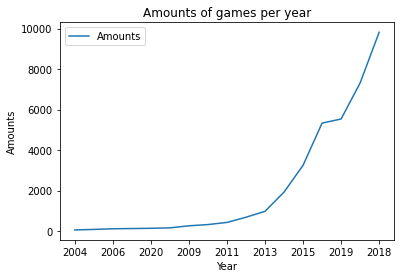

In [225]:

graph_year_amount = sg_df["ReleaseYear"].value_counts().sort_values().plot()
graph_year_amount.set_xlabel("Year")
graph_year_amount.set_ylabel("Amounts")
graph_year_amount.set_title("Amounts of games per year")
graph_year_amount.legend(["Amounts"])

#From this graph, it's easy to see that there are more and more new games are published on Steam

In [226]:
sg_df[["genre"]]

,genre
0,Action
1,"Action,Adventure,Massively Multiplayer"
2,"Action,Adventure,Strategy"
3,"Action,Adventure,Massively Multiplayer"
4,"Action,Free to Play,Massively Multiplayer,RPG,..."
...,...
40828,"Casual,Simulation"
40829,"Casual,Simulation"
40830,"Indie,RPG,Strategy"
40831,Action


#### We distinguish the game types by adding a boolean to the for loop.

In [227]:
sg_df["genre"]


0                                                   Action
1                   Action,Adventure,Massively Multiplayer
2                                Action,Adventure,Strategy
3                   Action,Adventure,Massively Multiplayer
4        Action,Free to Play,Massively Multiplayer,RPG,...
                               ...                        
40828                                    Casual,Simulation
40829                                    Casual,Simulation
40830                                   Indie,RPG,Strategy
40831                                               Action
40832                                        Adventure,RPG
Name: genre, Length: 40833, dtype: object

In [228]:
Action_list = []
Adventrue_list = []
Massively_list = []
Free_to_Play_list = []
Strategy_list = []
Early_Access_list = []
RPG_list = []
Simulation_list = []
Racing_list = []
Casual_list = []




for i in sg_df["genre"]:
    temp = str(i).split(",")
    if "Action" in temp:
        Action_list.append(True)
    else:
        Action_list.append(False)

    if "Adventure" in temp:
        Adventrue_list.append(True)
    else:
        Adventrue_list.append(False) 
        
    if "Massively Multiplayer" in temp:
        Massively_list.append(True)
    else:
        Massively_list.append(False)   
    
    if "Free to Play" in temp:
        Free_to_Play_list.append(True)
    else:
        Free_to_Play_list.append(False)   
    
    if "Strategy" in temp:
        Strategy_list.append(True)
    else:
        Strategy_list.append(False)
    
    if "Early Access" in temp:
        Early_Access_list.append(True)
    else:
        Early_Access_list.append(False)

    if "RPG" in temp:
        RPG_list.append(True)
    else:
        RPG_list.append(False)

    if "Simulation" in temp:
        Simulation_list.append(True)
    else:
        Simulation_list.append(False)

    if "Racing" in temp:
        Racing_list.append(True)
    else:
        Racing_list.append(False)

    if "Casual" in temp:
        Casual_list.append(True)
    else:
        Casual_list.append(False)

sg_df["isAction"] = Action_list
sg_df["isAdventure"] = Adventrue_list
sg_df["isMassively_Online"] = Massively_list
sg_df["isFreeToPlay"] = Free_to_Play_list
sg_df["isStrategy"] = Strategy_list
sg_df["isEarlyAccess"] = Early_Access_list
sg_df["isRPG"] = RPG_list
sg_df["isSimulation"] = Simulation_list
sg_df["Racing"] = Racing_list
sg_df["Casual"] = Casual_list

sg_df



,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,isAction,isAdventure,isMassively_Online,isFreeToPlay,isStrategy,isEarlyAccess,isRPG,isSimulation,Racing,Casual
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,True,False,False,False,False,False,False,False,False,False
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,True,True,True,False,False,False,False,False,False,False
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",...,True,True,False,False,True,False,False,False,False,False
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",...,True,True,True,False,False,False,False,False,False,False
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",...,True,False,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation",...,False,False,False,False,False,False,False,True,False,True
40829,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation",...,False,False,False,False,False,False,False,True,False,True
40830,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,NaN,"Jul 31, 2018","SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...",...,False,False,False,False,True,False,True,False,False,False
40831,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,NaN,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,...,True,False,False,False,False,False,False,False,False,False


In [229]:
sg_df[["ReleaseYear","isAction", "isAdventure", 
"isMassively_Online", "isFreeToPlay", 
"isStrategy", "isEarlyAccess", "isRPG", 
"isSimulation", "Racing", "Casual"]].sum()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4448/1502837088.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sg_df[["ReleaseYear","isAction", "isAdventure",


isAction              16558
isAdventure           13106
isMassively_Online     1349
isFreeToPlay           2687
isStrategy             8819
isEarlyAccess          2992
isRPG                  7595
isSimulation           9491
Racing                 1553
Casual                13083
dtype: int64

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4448/4081905276.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sg_df[["ReleaseYear","isAction", "isAdventure",


<AxesSubplot:>

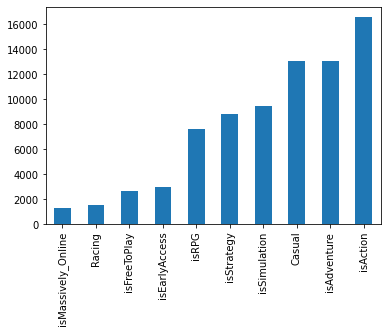

In [230]:
sg_df[["ReleaseYear","isAction", "isAdventure", 
"isMassively_Online", "isFreeToPlay", 
"isStrategy", "isEarlyAccess", "isRPG", 
"isSimulation", "Racing", "Casual"]].sum().sort_values().plot.bar()

#This step visualized the amount of games by their genres


#### We split the game type of each game from the original dataframe.

Our Next Step is create a prediction model based on the dataframe we got. My idea is to create a model to predice the review of the game (for example, mostly positive, negative, and so on). Because we only need a general review (without rating), so we need to split the data in review column first, then only take the first element. Then, We will use ```get_dummies()``` function to transfrom review column in the form that easier for us to analysis. 

In [261]:
temp_result = []
for i in sg_df["all_reviews"]:
    temp_result.append(str(i).split(",")[0])
sg_df["reviews"] = temp_result
display(sg_df[["all_reviews","reviews"]])
print(sg_df["reviews"].value_counts())
print(sg_df["reviews"])
sg_reviews = pd.get_dummies(sg_df["reviews"])
sg_reviews["1 user reviews"].sum() + sg_reviews["2 user reviews"].sum() + sg_reviews["3 user reviews"].sum() + sg_reviews["4 user reviews"].sum() + sg_reviews["5 user reviews"].sum() + sg_reviews["6 user reviews"].sum() + sg_reviews["7 user reviews"].sum() + sg_reviews["8 user reviews"].sum() + sg_reviews["9 user reviews"].sum()

sg_reviews["less than 10 reviews"] = sg_reviews["1 user reviews"] + sg_reviews["2 user reviews"] + sg_reviews["3 user reviews"] + sg_reviews["4 user reviews"] + sg_reviews["5 user reviews"] + sg_reviews["6 user reviews"] + sg_reviews["7 user reviews"] + sg_reviews["8 user reviews"] + sg_reviews["9 user reviews"] + sg_reviews["nan"]

sg_reviews["less than 10 reviews"].sum()

sg_reviews = sg_reviews.drop(["1 user reviews", "2 user reviews", "3 user reviews", "4 user reviews", "5 user reviews", "6 user reviews", "7 user reviews", "8 user reviews", "9 user reviews", "nan"], axis = 1)
sg_reviews

,all_reviews,reviews
0,"Very Positive,(42,550),- 92% of the 42,550 use...",Very Positive
1,"Mixed,(836,608),- 49% of the 836,608 user revi...",Mixed
2,"Mostly Positive,(7,030),- 71% of the 7,030 use...",Mostly Positive
3,"Mixed,(167,115),- 61% of the 167,115 user revi...",Mixed
4,"Mostly Positive,(11,481),- 74% of the 11,481 u...",Mostly Positive
...,...,...
40828,NaN,nan
40829,NaN,nan
40830,NaN,nan
40831,NaN,nan


nan                        12363
Mixed                       4680
Very Positive               4539
Positive                    3551
Mostly Positive             3311
1 user reviews              3023
2 user reviews              1926
3 user reviews              1469
4 user reviews              1082
5 user reviews               948
6 user reviews               838
Mostly Negative              782
7 user reviews               693
8 user reviews               600
9 user reviews               528
Overwhelmingly Positive      321
Negative                     135
Very Negative                 37
Overwhelmingly Negative        7
Name: reviews, dtype: int64
0          Very Positive
1                  Mixed
2        Mostly Positive
3                  Mixed
4        Mostly Positive
              ...       
40828                nan
40829                nan
40830                nan
40831                nan
40832                nan
Name: reviews, Length: 40833, dtype: object


,Mixed,Mostly Negative,Mostly Positive,Negative,Overwhelmingly Negative,Overwhelmingly Positive,Positive,Very Negative,Very Positive,less than 10 reviews
0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
40828,0,0,0,0,0,0,0,0,0,1
40829,0,0,0,0,0,0,0,0,0,1
40830,0,0,0,0,0,0,0,0,0,1
40831,0,0,0,0,0,0,0,0,0,1


And now we can sum up the review of games now. From the result we got, we see Although there are more then 40,000 games on steam, there are 12363 games that dont have any comment, and there are 11107 games that have less than 10 reviews. Those games constructed more than the half of games on steam. 

<AxesSubplot:>

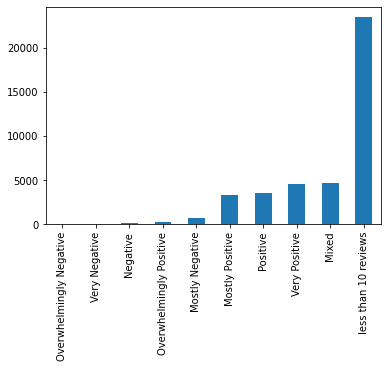

In [232]:
sg_reviews.sum().sort_values().plot.bar()

****After we got such datas, we can do some simple analyze now. Firstly, I want to see the review of all action games. By using a graph it will be easier for as to understand****

<AxesSubplot:>

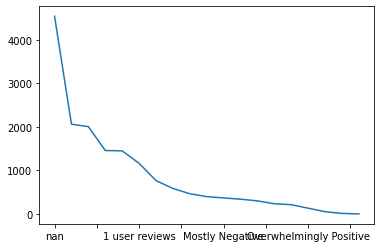

In [239]:
sg_df[sg_df["isAction"] == True]["reviews"].value_counts().plot()

From this graph, it's easy for us to see as one of the most popular type game on steam, most of them still don't have many reviews. Next step we need to narrow down the range. This time we want to see the review of the action game that have more than 10 reviews. But to do that, we need to make a small modification to ```reviews``` row first

In [269]:
replace_rows = ["nan","1 user reviews", "2 user reviews", "3 user reviews", "4 user reviews", "5 user reviews", "6 user reviews", "7 user reviews", "8 user reviews", "9 user reviews"]
sg_df["reviews"] = sg_df["reviews"].replace(replace_rows, "less than 10 reviews")


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4448/2789926969.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sg_df[sg_df["reviews"] != "less than 10 reviews"][sg_df["isAction"] == True]["reviews"].value_counts().sort_values().plot.bar()


<AxesSubplot:>

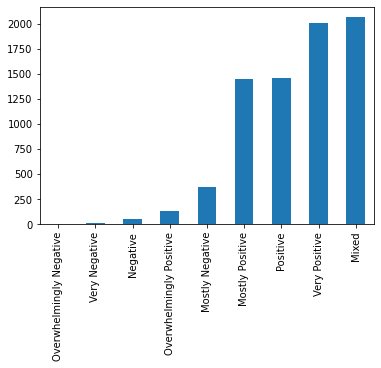

In [273]:
sg_df[sg_df["reviews"] != "less than 10 reviews"][sg_df["isAction"] == True]["reviews"].value_counts().sort_values().plot.bar()

Now, we have improved our ```reviews``` row, and when we see a very interesting fact: for action game, the amount of mixed review games and very positive review gamae are similar. 

#### We noticed that the trend in gaming is driven mainly by a few particularly hot games. After the release of The Legend of Zelda Breath of the Wild there was a huge rise in the number of action games on the market that tie in with the open world. There has also been a significant increase in the number of competitive multiplayer shooters or action games on the market after PUBG. It can be seen that the mainstream game genre in the gaming world is relatively stable. For example, action games have occupied the mainstream game part for a long time. And puzzle games have not been occupying the main market of games. In this case we would like to create a model to predict the popularity of a game after its release. This will be related to the publisher, the type of game, and the pricing.

In [251]:
sg_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,isAdventure,isMassively_Online,isFreeToPlay,isStrategy,isEarlyAccess,isRPG,isSimulation,Racing,Casual,reviews
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,False,False,False,False,False,False,False,False,False,Very Positive
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,True,True,False,False,False,False,False,False,False,Mixed
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",...,True,False,False,True,False,False,False,False,False,Mostly Positive
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",...,True,True,False,False,False,False,False,False,False,Mixed
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",...,False,True,True,True,False,True,False,False,False,Mostly Positive


In [ ]:
"""
feature = ["developer", "isAdventure", "isMassive_Online", "isFreeToPlay", "isStrategy", "isRPG", "isSimulation", "Racing"]
X_train_dict = sg_df[feature].to_dict(orient="records")
y_train = sg_df["reviews"]
"""

In [ ]:
"""
x_new = pd.Series(index=X_train.columns, dtype=float)
x_new["developer"] = 
x_new["isAdventure"] = 
x_new["isMassive_Online"] = 
x_new["Half Bath"] = 
x_new["isFreeToPlay"] = 
x_new["isStrategy"] = 
x_new["isRPG"] = 
x_new["isStimulation"] = 
x_new["racing"] = 
"""

In [ ]:
"""
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_sc = (X_train - X_train_mean) / X_train_std
x_new_sc = (x_new - X_train_mean) / X_train_std

dists = np.sqrt(((X_train - x_new)**2).sum(axis=1))
i_nearest = dists.sort_values()[:30].index

y_train.loc[i_nearest].mean()
"""

In [ ]:
"""
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
"""

In [ ]:
"""
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train_sc, y_train)


y_train_pred = model.predict(X_train_sc)
y_train_pred
"""

We had great difficulties in building the mod. The dataframe we selected did not have enough numbers of data to allow us to build a K-Nearest Neighbor model. kNN is the only model we have learned so far that can predict data, and works by predicting a new data by the k most recent data in the graph. But because of this, KNN does not predict the text. We started with the wrong direction for creating the model, so our next step is to convert the text in the dataframe into numbers to allow KNN to be applied to the new dataframe. This will be a big project because the text content is very different. Our current idea is to integrate data from several large companies and use this data as the basis for prediction. Because we noticed that most of the phenomenal games are developed by these big companies. And these companies have the biggest influence on the type of games that are popular in that year. Therefore, in order to make our prediction model more relevant, only data from these sizable companies will be used in the prediction model. The prediction will also be for the popularity of future game releases from these large companies.